In [ ]:
#p.95
# 1,000개의 랜덤 데이터를 생성한 뒤, 이 데이터들이 특정 구간(bin)에 각각 몇 개씩 들어가는지 계산하여 
# 히스토그램의 빈도수(frequency)를 구하기
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randn(1000) # 표준 정규분포를 따르는 1000개의 랜덤숫자 생성
bins = np.linspace(-5,5,20) # 히스토그램의 각 bin을 구분하는 경계선 역할
bins[0], bins[1] # bins[0]~bins[1] : 첫번째 구간, bins[1]~bins[2] : 두번째 구간...
# x에 있는 1000개의 데이터가 총 19개의 구간 중에서 어디에 속하는지 찾기

(np.float64(-5.0), np.float64(-4.473684210526316))

In [ ]:
# 각 구간에 속하는 데이터의 갯수(빈도수)를 저장하기 위한 배열 생성
counts = np.zeros_like(bins) # zeros_like() : 배열과 똑같은 모양을 가진 새로운 배열을 만들되, 모든 요소를 0으로 채워서 반환
bins.shape, counts.shape

In [ ]:
# x의 각 데이터가 속할 구간 찾기
i = np.searchsorted(bins, x) # np.searchsorted(a, v) : 정렬된 배열 a에 대해, v의 각 요소가 정렬 순서를 유지하면서 들어갈 위치(인덱스)=구간의 인덱스를 찾아 반환

In [ ]:
# 각 구간에 1 더하기
np.add.at(counts,i,1) # np.add.at(a, indices, b) : 배열 a의 indices 위치에 b 값을 누적해서 더함

(array([  0.,   0.,   0.,   3.,   3.,  30.,  60., 119., 188., 220., 180.,
        105.,  56.,  25.,  10.,   1.,   0.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x1a0647f4790>])

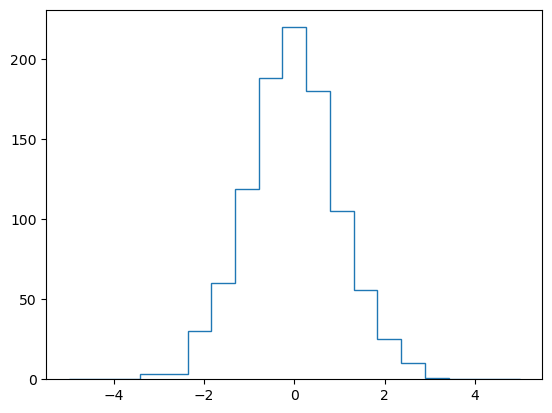

In [12]:
plt.hist(x,bins, histtype="step")

# 과제3: 정규분포 난수로 히스토그램 만들기 (팬시 인덱싱과 브로드캐스팅 활용)
목표: 난수를 생성하고, 직접 구간에 속하는 인덱스를 계산하여 히스토그램을 생성. np.searchsorted를 사용하지 않고 각 값이 어느 구간에 속하는지 확인.

## 구현 순서:

1. 난수 생성:

평균이 0, 표준편차가 1인 정규분포에서 난수 10,000개를 생성하여 data 배열에 저장.


In [ ]:
import numpy as np
data = np.arange

2. 구간 설정:

-10에서 10까지 20개의 구간을 균등하게 나누어 bins 배열.
이 구간들은 히스토그램의 각 구간 경계.



In [4]:
np.linspace(-10,10,20)

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

3. 구간 인덱스 계산:

data의 각 값이 어느 구간에 속하는지 직접 계산하여 구간 인덱스 배열 indices에 저장.
예를 들어, data의 값이 특정 구간에 속하면 indices 배열에 그 구간 인덱스를 기록합니다.
이 과정에서 브로드캐스팅과 팬시 인덱싱을 활용하여 효율적으로 구간 인덱스를 계산.

4. 누적 카운팅:

구한 indices 값을 사용하여, 각 구간별로 카운트를 계산.
팬시 인덱싱을 통해 indices에 해당하는 counts 위치에 1씩 누적.



5. 결과 시각화:

구간별 빈도수를 그래프로 시각화하여 히스토그램.
bins와 counts를 사용하여 히스토그램이 올바르게 그려졌는지 확인.